In [13]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import datetime

exMwd = pd.read_csv('exits_morning_weekday.csv')
enEwd = pd.read_csv('entries_evening_weekday.csv')
enMwd = pd.read_csv('entries_morning_weekday.csv')
exEwd = pd.read_csv('exits_evening_weekday.csv')
top_wd = pd.read_csv('bus_day_top.csv')

# exMwd.head(25)
# enMwd.head(25)
# exEwd.head(25)
# enEwd.head(25)
# top_wd.head()

In [14]:
del exMwd['Unnamed: 0']
del exMwd['IS_WEEKDAY']
del enEwd['Unnamed: 0']
del enEwd['IS_WEEKDAY']
exMwd.head(40)
enEwd.head(40)
del top_wd['Unnamed: 0']
del top_wd['TOD_x']
del top_wd['IS_WEEKDAY_x']
del top_wd['TOD_y']
del top_wd['IS_WEEKDAY_y']
top_wd.head(150)

,STATION,LINENAME,DELTA_ENTRIES,DELTA_EXITS,AVERAGE_DAILY
0,42 ST-GRD CNTRL,4567S,103523.450000,84006.600000,187530.050000
1,GRD CNTRL-42 ST,4567S,95636.275000,77394.850000,173031.125000
2,34 ST-HERALD SQ,BDFMNQR,75811.075000,51760.775000,127571.850000
3,34 ST-HERALD SQ,BDFMNQRW,74219.100000,52449.500000,126668.600000
4,47-50 ST-ROCK,BDFM,50416.100000,48967.800000,99383.900000
5,47-50 STS ROCK,BDFM,46917.950000,47624.800000,94542.750000
6,42 ST-TIMES SQ,1237ACENQRS,52504.850000,33456.400000,85961.250000
7,14 ST-UNION SQ,LNQR456,47886.975000,30920.525000,78807.500000
8,14 ST-UNION SQ,LNQR456W,47095.200000,31148.400000,78243.600000
9,PATH NEW WTC,1,39048.700000,34683.200000,73731.900000


In [15]:
top_wd.drop(top_wd.index[[1,3,5,8,10,18,23,26,29]], inplace=True)
top_wd.drop(top_wd.index[[9,11,14,15,16,19,20,27]], inplace=True)
del top_wd['AVERAGE_DAILY']
top_wd.head(40)

,STATION,LINENAME,DELTA_ENTRIES,DELTA_EXITS
0,42 ST-GRD CNTRL,4567S,103523.450000,84006.600000
2,34 ST-HERALD SQ,BDFMNQR,75811.075000,51760.775000
4,47-50 ST-ROCK,BDFM,50416.100000,48967.800000
6,42 ST-TIMES SQ,1237ACENQRS,52504.850000,33456.400000
7,14 ST-UNION SQ,LNQR456,47886.975000,30920.525000
9,PATH NEW WTC,1,39048.700000,34683.200000
11,LEXINGTON-53 ST,EM6,34895.750000,33698.250000
12,FULTON ST,2345ACJZ,32813.583333,33590.566667
13,59 ST-COLUMBUS,ABCD1,39200.350000,26831.200000
15,34 ST-PENN STA,ACE,36311.350000,27604.133333


In [16]:
top_wd_s = top_wd.groupby(['STATION']).mean()
top_wd_s = top_wd_s[['DELTA_EXITS','DELTA_ENTRIES']]

top_wd_s.head(100)

,DELTA_EXITS,DELTA_ENTRIES
STATION,,
14 ST-UNION SQ,30920.525000,47886.975000
34 ST-HERALD SQ,51760.775000,75811.075000
34 ST-PENN STA,27604.133333,36311.350000
42 ST-BRYANT PK,25902.900000,29959.566667
42 ST-GRD CNTRL,84006.600000,103523.450000
42 ST-TIMES SQ,33456.400000,52504.850000
47-50 ST-ROCK,48967.800000,50416.100000
57 ST-7 AV,12466.350000,22577.800000
59 ST,28194.350000,34175.100000


In [17]:
best_wd = top_wd_s.query('STATION == "14 ST-UNION SQ" | STATION == "47-50 ST-ROCK" | STATION == "42 ST-GRD CNTRL"')
best_wd.head()

,DELTA_EXITS,DELTA_ENTRIES
STATION,,
14 ST-UNION SQ,30920.525,47886.975
42 ST-GRD CNTRL,84006.600,103523.450
47-50 ST-ROCK,48967.800,50416.100


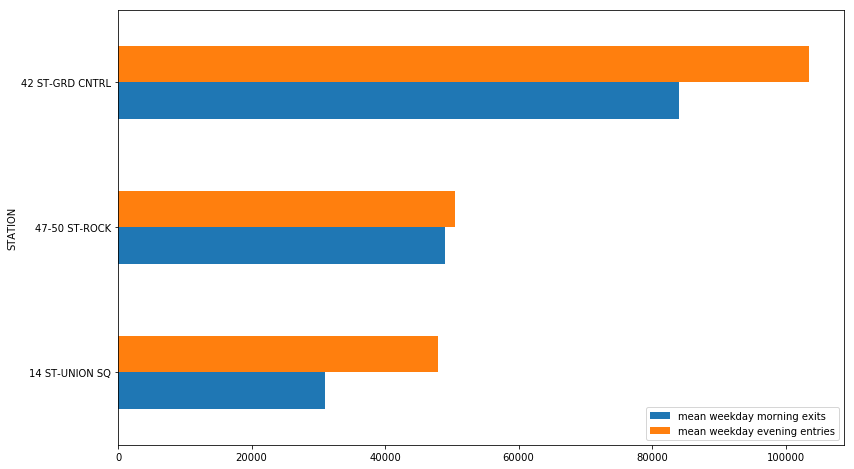

In [18]:
best_wd = best_wd.sort_values(by=('DELTA_EXITS'), ascending=True)

fig = plt.figure(figsize=(13,8))
ax = plt.axes()
best_wd.plot(
    kind='barh',
    ax=ax,
);
ax.legend(["mean weekday morning exits", "mean weekday evening entries"]);

fig.savefig('best_overall.pdf')

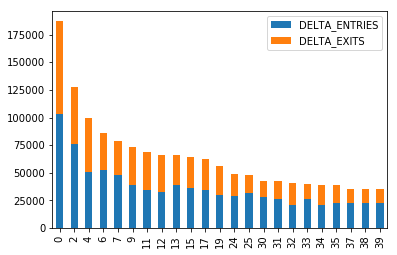

In [19]:
fig = plt.figure(figsize=(10,7.5))
top_wd.plot(
    kind='bar',
    stacked=True
);

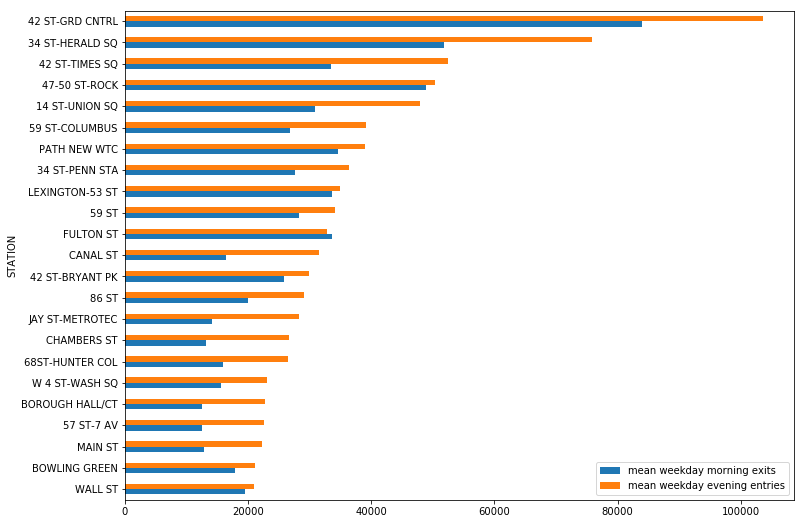

In [20]:
top_wd_s = top_wd_s.sort_values(by=('DELTA_ENTRIES'), ascending=True)

fig = plt.figure(figsize=(12,9))
ax = plt.axes()
top_wd_s.plot(
    kind='barh',
    ax=ax,
);
ax.legend(["mean weekday morning exits", "mean weekday evening entries"]);

# fig.savefig('top_weekday.pdf')

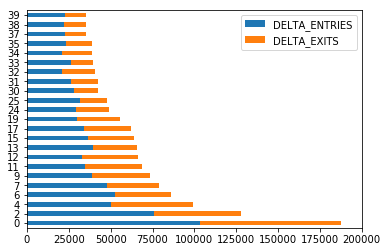

In [21]:
fig = plt.figure(figsize=(10,7.5))
top_wd.plot(
    kind='barh',
    xlim=(0, 200000),
    stacked=True
);

In [22]:
march = pd.read_csv('clean_march.csv')
march.shape

(1542193, 21)

In [23]:
del march['Unnamed: 0']
del march['C/A']
del march['SCP']
del march['DIVISION']
del march['TOD']
del march['NEXT_EXITS']
del march['NEXT_ENTRIES']
del march['IS_WEEKDAY']
march = march[['STATION','DELTA_ENTRIES','DELTA_EXITS','DOTW','HOUR']]
march.head(100)

,STATION,DELTA_ENTRIES,DELTA_EXITS,DOTW,HOUR
0,LEXINGTON AVE,81.0,80.0,5,7
1,LEXINGTON AVE,198.0,66.0,5,11
2,LEXINGTON AVE,381.0,57.0,5,15
3,LEXINGTON AVE,211.0,21.0,5,19
4,LEXINGTON AVE,41.0,55.0,6,7
5,LEXINGTON AVE,182.0,55.0,6,11
6,LEXINGTON AVE,214.0,52.0,6,15
7,LEXINGTON AVE,122.0,21.0,6,19
8,LEXINGTON AVE,206.0,341.0,0,7
9,LEXINGTON AVE,227.0,89.0,0,11


In [24]:
stations = march['STATION'].unique()

In [25]:
march_14 = march[march.STATION == '14 ST-UNION SQ']
march_14 = march_14.groupby(['DOTW','HOUR']).mean()
march_14 = march_14[['DELTA_EXITS','DELTA_ENTRIES']]

march_14.head(100)

DELTA_EXITS  DELTA_ENTRIES
DOTW HOUR                            
0    4      245.984211      98.605263
     5      460.045113     226.210526
     8      783.030303     416.772727
     9      665.650376     367.842105
     12     488.027624     581.176796
     13     518.547170     724.735849
     16     597.555556    1098.264550
     17     562.278195    1044.736842
1    4      258.268421      98.115789
     5      423.642857     209.063910
     7      112.333333      83.833333
     8      820.157895     425.821053
     9      604.541353     345.484962
     12     525.810526     615.510526
     13     480.996241     658.601504
     16     642.226316    1126.200000
     17     546.067669     941.665414
2    4      259.126316     102.184211
     5      475.567669     218.842105
     7        2.083333       2.583333
     8      779.311881     422.450495
     9      688.563910     398.992481
     12     539.778947     627.778947
     13     546.458647     760.842105
     16     657.794737    1121.026316
     17     631.045113    1092.748120
3    4      250.789474     101.215789
     5      465.484733     214.438931
     8      740.597156     389.658768
     9      690.000000     390.854962
...                ...            ...
     16     652.278947    1082.657895
     17     620.052632    1041.496241
     18     596.500000     619.083333
4    4      247.784211     100.452632
     5      435.146617     193.172932
     7      298.000000      90.333333
     8      772.452632     417.989474
     9      654.345865     394.432331
     10     111.384615     102.307692
     11     285.761905     194.666667
     12     513.632850     608.589372
     13     609.545113     804.203008
     16     705.310526    1101.457895
     17     656.172932    1012.229323
5    4       78.722772      41.785479
     5      143.105263      58.039474
     8      374.217822     185.247525
     9      463.289474     265.250000
     12     573.092105     546.565789
     13     608.256579     626.986842
     16     512.463333     667.416667
     17     472.677632     656.690789
6    4       51.592593      34.021164
     5       84.913534      46.112782
     8      263.042328     123.873016
     9      357.853383     180.135338
     12     471.000000     410.773684
     13     506.000000     484.713208
     16     365.920635     533.158730
     17     339.781955     540.248120

[62 rows x 2 columns]

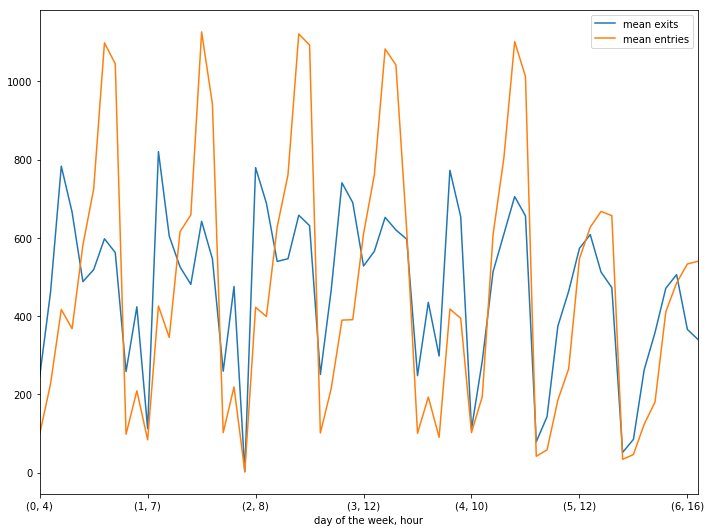

In [26]:
fig = plt.figure(figsize=(10,7.5))
ax = plt.axes()
march_14.plot(
    kind='line',
    ax=ax
);
ax.legend(["mean exits", "mean entries"]);
ax.set_xlabel("day of the week, hour")

plt.tight_layout()
# fig.savefig('march_unionsq.pdf')

In [27]:
march_8 = march[march.STATION == '8 AVE']
march_8 = march_8.groupby(['DOTW','HOUR']).mean()
march_8 = march_8[['DELTA_EXITS','DELTA_ENTRIES']]

march_8.head(100)

DELTA_EXITS  DELTA_ENTRIES
DOTW HOUR                            
0    4      113.833333     152.111111
     5      228.962963     267.537037
     8      398.888889     366.833333
     9      369.740741     331.703704
     12     336.277778     381.944444
     13     387.537037     476.092593
     16     426.722222     628.722222
     17     394.240741     609.481481
1    4      120.444444     164.222222
     5      209.888889     253.759259
     8      314.785714     280.035714
     9      363.370370     338.277778
     12     349.777778     401.833333
     13     395.296296     485.055556
     16     436.111111     629.055556
     17     390.296296     607.388889
2    4      117.000000     155.055556
     5      245.943396     278.716981
     8      389.166667     369.611111
     9      383.764706     364.000000
     12     344.500000     380.611111
     13     398.444444     493.259259
     16     447.111111     653.055556
     17     405.425926     622.481481
3    4      115.000000     153.611111
     5      238.796296     265.592593
     8      381.777778     352.277778
     9      367.629630     343.222222
     12     290.277778     363.611111
     13     377.333333     478.759259
     16     389.277778     531.333333
     17     413.509434     635.037736
4    4      109.333333     146.611111
     5      230.796296     247.777778
     8      408.444444     368.888889
     9      377.037037     336.037037
     12     355.555556     403.500000
     13     403.240741     495.222222
     16     504.388889     675.111111
     17     428.240741     596.425926
5    4       61.027778      64.444444
     5      111.694444      83.305556
     8      330.777778     221.694444
     9      332.277778     250.722222
     12     404.500000     422.333333
     13     364.805556     430.250000
     16     391.750000     498.250000
     17     336.972222     442.527778
6    4       41.722222      53.666667
     5       84.981481      59.111111
     8      303.777778     186.000000
     9      349.518519     258.277778
     12     310.000000     372.222222
     13     348.611111     454.814815
     16     225.722222     335.166667
     17     269.333333     390.500000

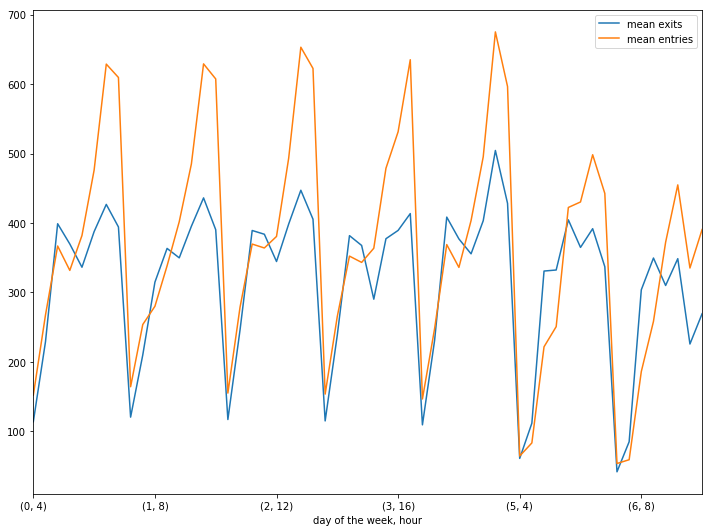

In [28]:
fig = plt.figure(figsize=(10,7.5))
ax = plt.axes()
march_8.plot(
    kind='line',
    ax=ax
);
ax.legend(["mean exits", "mean entries"]);
ax.set_xlabel("day of the week, hour")

plt.tight_layout()
# fig.savefig('march_8ave.pdf')